<a href="https://colab.research.google.com/github/athibhash5/myworkouts/blob/main/TNNExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [21]:
from keras.layers import Input,Dense,Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt


In [22]:
IMAGE_SIZE=[224,224]
trainpath='/content/drive/MyDrive/Data Science/Deep Learning/maskdataset'
testpath='/content/drive/MyDrive/Data Science/Deep Learning/testmaskdata'
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)


In [ ]:
#/content/drive/MyDrive/Data Science/Deep Learning/maskdataset
#/content/drive/MyDrive/Data Science/Deep Learning/testmaskdata

In [ ]:
#'vgg' is a pre-trained VGG model
#[3] corresponds to the number of channels (RGB).
#weights: This parameter determines the weight initialization of the model. Setting it to 'imagenet' means that the model will be initialized with weights pre-trained on the ImageNet dataset.
#include_top: Setting this parameter to False excludes the top (fully connected) layers of the model. This is useful if you want to use the convolutional base of VGG16 for feature extraction but plan to add your own dense layers on top.


In [23]:
for layer in vgg.layers:
    layer.trainable=False  #don't train existing weights

In [ ]:
#freeze the weights of pre-trained layers to prevent them from being updated during the training of a new model.

In [25]:
x=Flatten()(vgg.output)                               # Flatten the output of VGG
prediction=Dense(2,activation='softmax')(x)           # Add a Dense layer for classification
model=Model(inputs=vgg.input,outputs=prediction)      # Create a new model with VGG as the base and your custom layers on top
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [27]:
#rescale: This parameter scales the pixel values of the images. In this case, it's set to 1./255, which means each pixel value will be divided by 255. This is a standard practice to normalize pixel values to the range [0, 1].
#shear_range: This parameter is responsible for shearing transformations, which basically slant the image. It's set to 0.2, meaning that the shearing angle will be randomly chosen from the range [-0.2, 0.2].
#zoom_range: This parameter controls the zooming of the image. A zoom_range of 0.2 means that the image can be zoomed in or out by a factor randomly chosen from the range [0.8, 1.2].
#horizontal_flip: This parameter enables horizontal flipping of images. If set to True, some of the images will be flipped horizontally.


In [28]:
test_datagen=ImageDataGenerator(rescale=1./255)
training_set=train_datagen.flow_from_directory(trainpath,target_size=(224,224),batch_size=20,class_mode='categorical')


Found 1374 images belonging to 2 classes.


In [ ]:
#flow_from_directory: This method generates batches of augmented data from a directory containing images.
#batch_size: This parameter determines the size of each batch of images generated by the generator. here set it to 20, meaning each batch will contain 20 images
#class_mode: This parameter specifies the type of labels returned by the generator. here  used 'categorical', the generator will return one-hot encoded class labels. This is suitable for multi-class classification problems.


In [29]:
test_set=test_datagen.flow_from_directory(testpath,target_size=(224,224),batch_size=20,class_mode='categorical')
r=model.fit_generator(training_set,validation_data=test_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(test_set))

Found 48 images belonging to 2 classes.


<ipython-input-29-f8cb397bced5>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(training_set,validation_data=test_set,epochs=5,steps_per_epoch=len(training_set),validation_steps=len(test_set))


Epoch 1/5
69/69 [==============================] - 1014s 15s/step - loss: 0.2137 - accuracy: 0.9163 - val_loss: 0.0221 - val_accuracy: 1.0000
Epoch 2/5
69/69 [==============================] - 987s 14s/step - loss: 0.0258 - accuracy: 0.9927 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 3/5
69/69 [==============================] - 953s 14s/step - loss: 0.0151 - accuracy: 0.9956 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 4/5
69/69 [==============================] - 951s 14s/step - loss: 0.0119 - accuracy: 0.9978 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 5/5
69/69 [==============================] - 965s 14s/step - loss: 0.0068 - accuracy: 0.9993 - val_loss: 0.0030 - val_accuracy: 1.0000


In [ ]:
#steps_per_epoch: This parameter specifies the number of batches to draw from the generator at each epoch. here set it to len(training_set), which means it will go through the entire training dataset in one epoch.


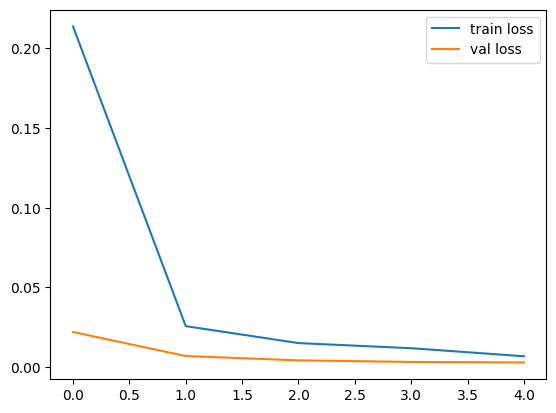

In [30]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()


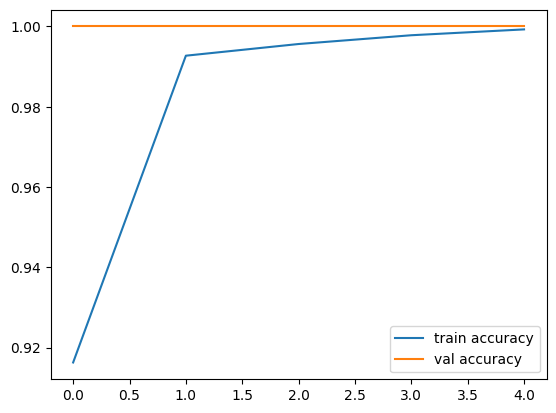

In [31]:
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()


In [32]:
model.save('built model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
